In [ ]:
! pip install librosa
! pip install soundfile

In [ ]:
import librosa

audio_path = '/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/bonafide/LA_D_1173765.flac'
x , sr = librosa.load(audio_path)

In [ ]:
print(x.shape, sr)

(46143,) 22050


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
import soundfile as sf 
from numpy.lib import stride_tricks

""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)   
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape=(int(cols), frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    

""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr=44100, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))

    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):        
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,int(scale[i]):], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,int(scale[i]):int(scale[i+1])], axis=1)

    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[int(scale[i]):])]
        else:
            freqs += [np.mean(allfreqs[int(scale[i]):int(scale[i+1])])]

    return newspec, freqs

""" plot spectrogram"""
def plotstft(audiopath, binsize=2**10, plotpath=None, colormap="jet"):
    samples, samplerate =  sf.read(audiopath)

    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)

    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel

    timebins, freqbins = np.shape(ims)

    print("timebins: ", timebins)
    print("freqbins: ", freqbins)

    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    # plt.colorbar()

    plt.xlabel("time (s)").set_visible(False)
    plt.ylabel("frequency (hz)").set_visible(False)
    # plt.xlim([0, timebins-1]).set_visible(False)
    # plt.ylim([0, freqbins]).set_visible(False)

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.axis('off')
        plt.savefig(plotpath,bbox_inches="tight", pad_inches=0)
    else:
        plt.show()

    plt.clf()

    return ims

ims = plotstft(audio_path, plotpath="/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/img1.png")

timebins:  66
freqbins:  513


<Figure size 1080x540 with 0 Axes>

In [ ]:
import cv2
 
# read image
img = cv2.imread('/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/img.png', cv2.IMREAD_UNCHANGED)
 
# get dimensions of image
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (407, 837, 4)
Image Height       :  407
Image Width        :  837
Number of Channels :  4


In [ ]:

# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'bonafide spoof'.split()
for g in genres:
    pathlib.Path(f'/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}'):
        songname = f'/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}/{filename}'
         y, sr = librosa.load(songname, mono=True, duration=5)
        # plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        # plt.axis('off');
        #plt.show()
        # plt.savefig(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        #files.download(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        #break;
        ims = plotstft(songname, plotpath=f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

In [ ]:
# Import Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Specify transforms using torchvision.transforms as transforms
# library
transformations = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_set = datasets.ImageFolder("/content/drive/MyDrive/ASVspoof2019-master.zip (Unzipped Files)/img_data", transform = transformations)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=2, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


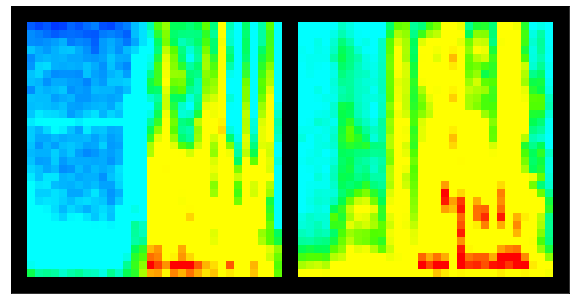

In [ ]:
for images, labels in train_loader:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(torchvision.utils.make_grid(images, 4).permute(1,2,0))
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


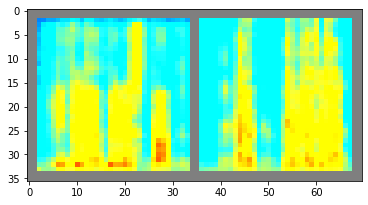

spoof bonafide


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

classes=["bonafide", "spoof"]
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images[0].shape)

torch.Size([3, 32, 32])


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

# Squeeze and Excitation Block Module
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()

        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels * 2, 1, bias=False),
        )

    def forward(self, x):
        w = F.adaptive_avg_pool2d(x, 1) # Squeeze
        w = self.fc(x)
        w, b = w.split(w.data.size(1) // 2, dim=1) # Excitation
        w = torch.sigmoid(w)

        return x * w + b # Scale and add bias

# Residual Block with SEBlock
class ResBlock(nn.Module):
    def __init__(self, channels):
        super(ResBlock, self).__init__()

        self.conv_lower = nn.Sequential(
            nn.Conv2d(channels, channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU()
        )

        self.conv_upper = nn.Sequential(
            nn.Conv2d(channels, channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

        self.se_block = SEBlock(channels)

    def forward(self, x):
        # path = self.conv_lower(x)
        # path = self.conv_upper(path)

        path = self.se_block(x)

        path = x + path
        return F.relu(path)

# Network Module
class Network(nn.Module):
    def __init__(self, in_channel, filters, blocks, num_classes):
        super(Network, self).__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channel, filters, 3, padding=1, bias=False),
            nn.BatchNorm2d(filters),
            nn.ReLU()
        )

        self.res_blocks = nn.Sequential(*[ResBlock(filters) for _ in range(blocks - 1)])

        self.out_conv = nn.Sequential(
            nn.Conv2d(filters, 128, 1, padding=0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.fc = nn.Linear(128, num_classes)
        self.se_block = SEBlock(filters)

    def forward(self, x):
        x = self.conv_block(x)
        x = self.se_block(x)
        
        x = self.out_conv(x)
        x = F.adaptive_avg_pool2d(x, 1)

        x = x.view(x.data.size(0), -1)
        x = self.fc(x)

        return F.log_softmax(x, dim=1)

In [ ]:
net = Network(3, 128, 2, 2).cuda()

In [ ]:

import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms


import time

EPOCHS = 40
BATCH_SIZE = 32
LEARNING_RATE = 1e-1
WEIGHT_DECAY = 1e-4

In [ ]:
ACE = nn.CrossEntropyLoss().cuda()

In [ ]:
opt = optim.SGD(net.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY, momentum=.9, nesterov=True)

for epoch in range(1, EPOCHS + 1):
    print('[Epoch %d]' % epoch)
    
    train_loss = 0
    train_correct, train_total = 0, 0

    start_point = time.time()

    for inputs, labels in train_loader:
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()


        opt.zero_grad()

        preds = net(inputs)
        
        loss = ACE(preds, labels)
        loss.backward()

        opt.step()

        train_loss += loss.item()

        train_correct += (preds.argmax(dim=1) == labels).sum().item()
        train_total += len(preds)

    print('train-acc : %.4f%% train-loss : %.5f' % (100 * train_correct / train_total, train_loss / len(train_loader)))
    print('elapsed time: %ds' % (time.time() - start_point))

    test_loss = 0
    test_correct, test_total = 0, 0
    


[Epoch 1]
train-acc : 62.2500% train-loss : 0.74613
elapsed time: 110s
[Epoch 2]
train-acc : 74.7500% train-loss : 0.53292
elapsed time: 5s
[Epoch 3]
train-acc : 95.5000% train-loss : 0.15219
elapsed time: 5s
[Epoch 4]
train-acc : 99.0000% train-loss : 0.04387
elapsed time: 5s
[Epoch 5]
train-acc : 97.2500% train-loss : 0.06600
elapsed time: 5s
[Epoch 6]
train-acc : 99.7500% train-loss : 0.00892
elapsed time: 5s
[Epoch 7]
train-acc : 100.0000% train-loss : 0.00374
elapsed time: 5s
[Epoch 8]
train-acc : 100.0000% train-loss : 0.00268
elapsed time: 5s
[Epoch 9]
train-acc : 100.0000% train-loss : 0.00625
elapsed time: 5s
[Epoch 10]
train-acc : 100.0000% train-loss : 0.00279
elapsed time: 5s
[Epoch 11]
train-acc : 99.7500% train-loss : 0.00718
elapsed time: 5s
[Epoch 12]
train-acc : 100.0000% train-loss : 0.00178
elapsed time: 5s
[Epoch 13]
train-acc : 100.0000% train-loss : 0.00232
elapsed time: 5s
[Epoch 14]
train-acc : 100.0000% train-loss : 0.00384
elapsed time: 5s
[Epoch 15]
train-acc

In [ ]:
data = data.drop(['filename'],axis=1)

In [ ]:
genre_list = data.iloc[:, -1]
print (genre_list)
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

0       bonafide
1       bonafide
2       bonafide
3       bonafide
4       bonafide
          ...   
5091       spoof
5092       spoof
5093       spoof
5094       spoof
5095       spoof
Name: label, Length: 5096, dtype: object
[0 0 0 ... 1 1 1]


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
print(X)

[[ 0.93881984  1.          0.3855387  ...  1.160581   -0.46293705
   1.03593567]
 [ 0.62178625  1.         -1.14277379 ...  1.64959107  0.25061332
   0.86050055]
 [ 0.638055    1.          1.29036097 ...  0.39032652  0.89676219
   1.32807121]
 ...
 [-1.79213152  1.          0.79553029 ... -0.83945919 -0.43969481
  -1.50527861]
 [-1.55965784  1.          0.0277664  ... -0.77211212 -0.39361944
  -1.22811779]
 [-0.6958157   1.         -0.60880792 ... -0.88070746 -0.46971143
  -1.34522268]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

print(len(y_train))

print(len(y_test))

print(X_train[10])

4076
1020
[ 0.50338452  1.         -0.48074655  0.27624563 -0.22783712 -0.72099664
 -1.24130522 -0.1475511   0.15684185 -0.82462869 -0.55817666  0.2779111
  0.74838821  0.20056774  0.9560644  -0.9300712   1.01369811  0.42636055
 -0.88360718  0.71981802 -0.30247152  0.39446585 -0.25131302  0.63211029
 -0.72666895  0.60482687]


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=3,
                    batch_size=128)

Epoch 1/3
32/32 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.9495
Epoch 2/3
32/32 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9961
Epoch 3/3
32/32 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9971


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9980


In [ ]:
print('test_acc: ',test_acc)

test_acc:  0.998039186000824


In [ ]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [ ]:

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=32,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/30
122/122 [==============================] - 1s 5ms/step - loss: 0.0532 - accuracy: 0.9822 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/30
122/122 [==============================] - 1s 4ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/30
122/122 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.9977 - val_loss: 2.2716e-04 - val_accuracy: 1.0000
Epoch 4/30
122/122 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 1.6559e-04 - val_accuracy: 1.0000
Epoch 5/30
122/122 [==============================] - 1s 4ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 4.0423e-05 - val_accuracy: 1.0000
Epoch 6/30
122/122 [==============================] - 1s 5ms/step - loss: 1.8096e-04 - accuracy: 1.0000 - val_loss: 2.6656e-05 - val_accuracy: 1.0000
Epoch 7/30
122/122 [==============================] - 1s 4ms/step - loss: 3.7367e-05 - accuracy: 1.0000 - val_loss: 1.9755e-05 -

In [ ]:
predictions = model.predict(X_test)
print(y_test[1000])

1


In [ ]:
print(predictions[1000])

[1.]


In [ ]:
print(np.sum(predictions[0]))

np.argmax(predictions[0])

1.0


0